# Analysis of movie data

The point of this analysis is to learn how to investigate a dataset, starting with a dataset of movies.


## 1. Setting questions
## 2. Data wrangling
## 3. Data analysis
## 4. Conclusions

The first step begins with setting some questions.

## 1. Setting questions

Before we set questions we first need to see what data we have avaliable to us. This is done by importing the table of data.

In [1]:
import pandas as pd

#creating a read variable so that we can get a view of the data
movie_data = pd.read_csv('tmdb_movies.csv')

#calling out first 5 rows (excluding headers) of tmdb database
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now that we have all the data, we need to ask what questions can be asked from this data. 

The type of key information that we have been given is:
- A popularity score
- Revenue and budget
- Genres
- Production companies
- Vote count
- Release date and release year

So using this information there are a number of interesting questions that can be asked:
1. Movies with the highest and lowest revenues, budgets and profits?
2. What is the typical run-time of a movie?
3. Is there a relationship between release date and profit?

What about movies that are super popular (say over $100m), what drives their success?

Lets look at:
1. What is the genre that drives these movies?
2. Which are the most popular actors that star in these movies?
3. What is the profit (on average) of these movies?

In [2]:
#import the numpy library
import numpy as np

rows, col = movie_data.shape

#note we subtract '1' from the rows total since the header is included.
print('The total rows in the dataset are = {} and the total columns are = {}'.format(rows-1, col))

The total rows in the dataset are = 10865 and the total columns are = 21


Next we look at the dataset and delete any columns that clearly aren't needed for our analysis.

In [3]:
#lets give a list of movies that needs to be deleted
del_col = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_average']

#deleting these columns from the database
movie_data = movie_data.drop(del_col, 1)

#relook at dataset with new data
movie_data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015


We have now have the relevent data with the appropriate headings to begin the analysis.

## Data wrangling

This part of the process involves cleaning up the data. This involves taking out data that could distort out findings (such as duplicates) and making the remaining data more appropriate to use to answer our questions.

We will firstly remove any duplicate values from our data.

In [4]:
#this function will check for any duplicate rows but keep the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

rows, col = movie_data.shape
print('There are now {} movies in our datasheet and {} columns with our relevant features.'.format(rows-1, col))


There are now 10864 movies in our datasheet and 12 columns with our relevant features.


So we only had one movie that was a duplicate.

Since we are looking into revenue and budget numbers, we need to see if there are any movies without revenues or budgets (since these would add no value to our questions).

In [5]:
# identify the budget and revenue columns to check
check_col =['budget', 'revenue']

#we replace the '0's with not a number (NaN)
movie_data[check_col] = movie_data[check_col].replace(0, np.NaN)

#Removing all the rows which have NaN value in check_col 
movie_data.dropna(subset = check_col, inplace = True)

rows, col = movie_data.shape
print('We have taken out the movies without revenue and budget and now have {} movies.'.format(rows-1))

We have taken out the movies without revenue and budget and now have 3853 movies.


In summary, we have taken the data down from 10865 rows and 21 columns to 3853 movies and 12 columns.

Next, since we posed a question relating to release dates, we need to make sure we have the correct datetime function.

In [6]:
#in our data, find the release_data colomn and use the to_datetime function to get the correct format.
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#showing the dataset
movie_data.head(4)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015


We can now see from the table above that the date format has been updated. Next lets see what the remaining data types in the dataset look like.

In [7]:
#this shows all the datatypes for each of the columns
movie_data.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

For budget and revenue we have 'float' values which are not the correct format. We need to convert to 'int64' which is shown below.

In [8]:
#we need to define which columns have the incorrect formats
update_col = ['budget', 'revenue']

#applymap is the function that will convert to int64 format
movie_data[update_col] = movie_data[update_col].applymap(np.int64)
#this will show the updated column formats
movie_data.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

We now have the data in the correct format to begin our analysis.

# Data analysis
The first key questions we asked were:

1. Movies with the highest and lowest revenues, budgets and profits?
2. What is the typical run-time of a movie?
3. Is there a relationship between release date and profit?

Lets start with the first question. We have revenues and budgets therefore lets calculate profit before we do a high/low ranking since that will be driven by the same function.

In [9]:
#this function inserts a new column 'profit' which is the difference between revenue and budget
movie_data.insert(2, 'profit', movie_data['revenue'] - movie_data['budget'])

#checking to see this new dataset has been updated
movie_data.head(2)

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015


Now that we have the profit we can answer the question which movies are the most profitable.

In [10]:
#We need to make a function that finds the movies with both the highest and lowest profit.

def calculate(col_name):
    
    #highest value
    high = movie_data[col_name].idxmax()
    #store the data of the highest variable
    high_details = pd.DataFrame(movie_data.loc[high])
    
    #lowest value
    #store the data of the lowest variable
    low = movie_data[col_name].idxmin()
    low_details = pd.DataFrame(movie_data.loc[low])
    
    #take the two dataframes and create one
    two_in_one_data = pd.concat([high_details, low_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
calculate('profit')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


We can call the same function for finding the movies with the biggest and smallest budgets

In [11]:
calculate('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
profit,-413912431,99
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


And lastly, the same function to calculate revenue.

In [25]:
calculate('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
profit,2544505847,-5999998
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


Now that we have profits, revenue and budgets of the highest and lowest movies, lets look at the next question which relates to runtimes.

It would be interesting to see how the runtimes of the movies map on a graph. 

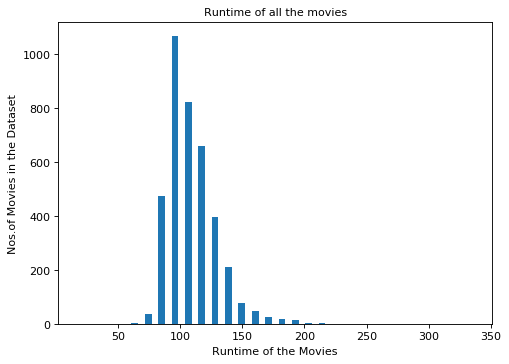

In [26]:
import matplotlib.pyplot as plt
% matplotlib inline
#first we need to be able to import the graphical libraries

#giving the figure size(width, height)
plt.figure(figsize=(7,5), dpi = 80)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 10)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=10)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=10)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.5, bins =30)
#displays the plot
plt.show()

Interestingly most movies seem to group around 100 minutes of runtime. Lets pull the statistics for this.

In [27]:
#overall statistics of the runtime data
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

We can see from this that the average runtime of a movie is 109 minutes which answers our question.

Our last question asks if there is relationship between the release year and the average runtime of movies. This trend would tell us that movies are getting longer or shorter over time.

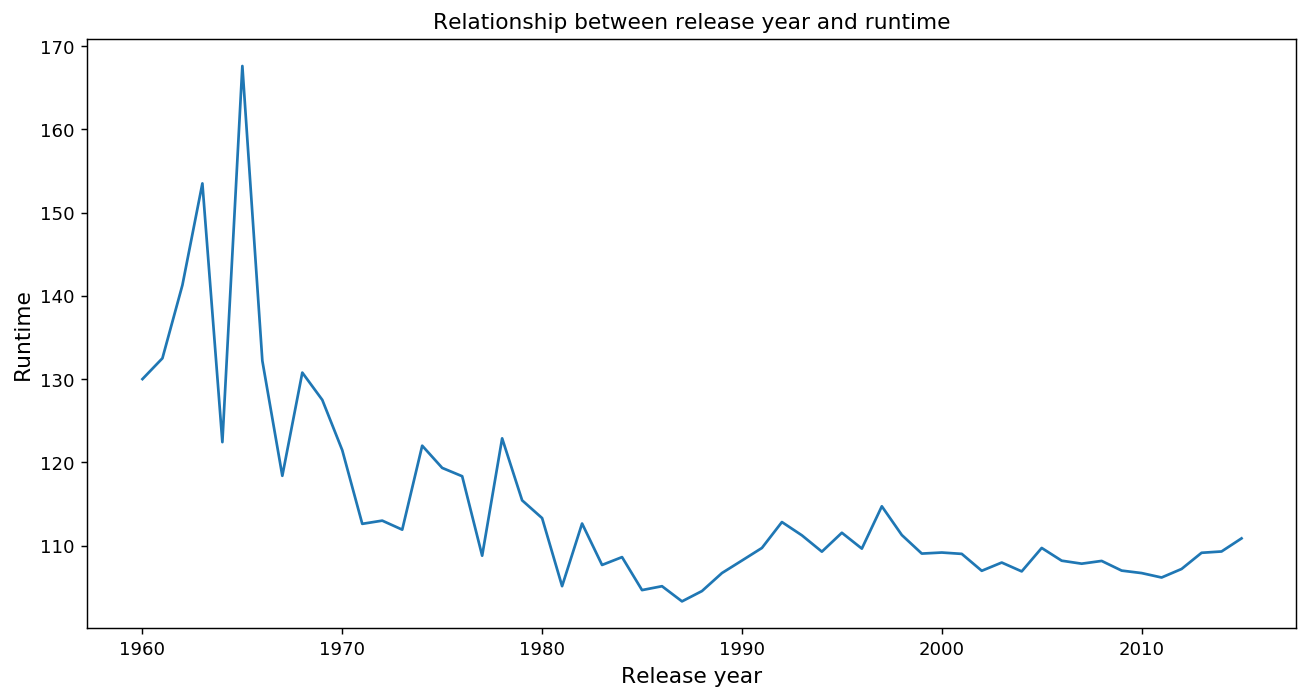

In [30]:

#this function will sum the runtime of each year
year = movie_data.groupby('release_year')['runtime'].mean()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release year', fontsize = 12)
#on y-axis
plt.ylabel('Runtime', fontsize = 12)
#title of the line plot
plt.title('Relationship between release year and runtime')

#plotting the graph
plt.plot(year)

#displaying the line plot
plt.show()

This is very interesting. The trend suggests that movies are getting shorter on average over time.

We now want to look at a very specific subset of movies. Movies that gross over $100m since there are the very successful movies.

We want to answer the following questions:
1. What are the most common genres that drives these movies?
2. Which are the most popular actors that star in these movies?
3. What is the profit (on average) of these movies?

The first step is to find these movies so we can apply functions to a subset of data.

In [17]:
#function that will find movies that have profit over $100m.
profit_data = movie_data[movie_data['profit'] >= 100000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
1,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
2,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
3,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015


In [18]:
#counting the no.of rows in the new data base
len(profit_data)

826

So only 826 movies have profits above $100m

Next we are going to create a function that can look at attributes of these movies such as cast and genre to see which of these are common elements.

In [19]:
#The purpose of this function is to take a column, seperate the strings and store the values seperately.
def data(column):
    #will take a column, and seperate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

Now that we have the function, the next step is to call the function with the genres column to find the most popular genres.

In [20]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

Here we can see that "Action" is the standout genre with movies that have revenue over $100m.

Next lets look at the cast.

In [22]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            23
Tom Hanks             19
Brad Pitt             18
Adam Sandler          17
Sylvester Stallone    16
dtype: int64

Tom cruise is clearly the stand out element when it comes to high revenue grossing movies which answers our second question.

In [23]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

Lastly we create a function to calculate the average profit of these movies.

In [24]:
#average runtime
profit_avg('profit')

270858474.0435835

The profit can be seen as $270m which is quite substantial.

## Conclusions:

Through our data analysis process we discovered the following:
- Avatar fared best in terms of revenue and profit and The Warriors Way spent the biggest budget
- The average runtime of a movie is 109 minutes and most movies fall around the 100 minutes mark according to our histogram.
- The average runtime of movies is trending down over time.
- Action and Comedy were the top two genres of movies with Revenue over $100m and Tom Cruise most popular actor, starting in 23 of these movies.

